# Example plotting script for model output in this repository
This script produces hovmoller plots of temperature, stratification (as squared buoyancy frequency), turbulent kinetic energy (TKE) ant timeseries of melt rate, similar to those found in Rosevear et al. (2020) The role of double-diffusive convection in the basal melting of Antarctic ice shelves. 

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo

In [33]:
### read in from NetCDF
# choose directory for experiment. Directories correspond to the experiment names in Rosevear et al. (2020). 
# Options are A1, B1, C1, C2& D1
datastr = "C1"
fname = './%s/OUTPUT_light.nc'% datastr
    
ds = xr.open_dataset(fname)

Text(0.5, 0, '$t$ (h)')

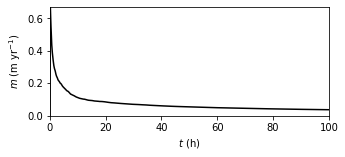

In [34]:
## Meltrate

# parameters from simulations
nu = 2.0e-6 #molecular viscosity (m^2 s^-1)
Pr = 14 #Prandtl number (dimensionles)
L = 3.35e5 # Latent heat of melting (units)
cp = 4.184e3 # Heat capacity of the ocean (units)
sy = 365*24*3600

# Calculate melt rate
dtdz = (ds.Temp[:,1]-ds.Temp[:,0])/(ds.y[1]-ds.y[0])
V = -(cp/L)*(nu/Pr)*(1/0.92)*dtdz*sy
meltrate = -V;


# Plotting
f, ax = plt.subplots(1,1) 
f.set_size_inches(5, 2)
ax.plot(time/T, meltrate,'-k')
ax.axis([0, Tmax,  0 , max(meltrate[3:-1])])
ax.set_ylabel("$m$ (m yr$^{-1}$)")
ax.set_xlabel('$t$ (h)')

**Figure:** evolution of melt rate ($m$) over time. 

Text(0.5, 0, '$t$ (h)')

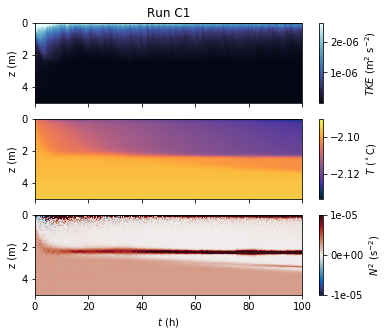

In [36]:
## not up to scratch with xarray for plotting, so back to the usual tricks
ymax = 5
Tmax = 100
T = 3600
time  = ds.t-ds.t[0]
y = ds.y

# plot
f, ax = plt.subplots(3,1) 
f.set_size_inches(6, 5)

ch = ax[0].pcolor(time/T, y, ds.TKE.transpose(), cmap=cmo.ice,  vmin=1e-8, vmax =max(ds.TKE[100,10:-1]))
ci = ax[1].pcolor(time/T, y, ds.Temp.transpose(), cmap=cmo.thermal,  vmin=np.min(ds.Temp[100,15:-1]), 
                  vmax =np.max(ds.Temp[100,15:-1]))
cj = ax[2].pcolor(time/3600, y, ds.N2.transpose(), cmap=cmo.balance, vmin = -1e-5, vmax =1e-5)

# Tidy plots
f.colorbar(ch, ax=ax[0], format='%.0e', label = '$TKE$ (m$^2$ s$^{-2}$)')
f.colorbar(ci, ax=ax[1], label = '$T$ ($^\circ$C)')
f.colorbar(cj, ax=ax[2], format='%.0e', label = '$N^2$ (s$^{-2}$)')

ax[0].set_title('Run '+datastr)
ax[0].axis([0, Tmax, ymax, 0 ])
ax[0].set_ylabel("z (m)")
ax[0].set_xticklabels([''])

ax[1].axis([0, Tmax, ymax, 0 ])
ax[1].set_ylabel("z (m)")
ax[1].set_xticklabels([''])

ax[2].axis([0, Tmax, ymax, 0 ])
ax[2].set_ylabel("z (m)")
ax[2].set_xlabel('$t$ (h)')

**Figure:** Evolution of plane-averaged turbulent kinetic energy ($TKE$), temperature ($T$) and squared buoyancy frequency ($N^2$) in time for the upper 5 m of the model domain. 